In [15]:
import numpy as np
import pandas as pd

In [16]:
csv_file1 = 'dataframe_data/heatmap_data.csv'

data = pd.read_csv(csv_file1)
Module1_index = data.iloc[:106, 0]
Module2_index = data.iloc[106:, 0]
Module2a_index = data.iloc[106:225, 0]
Module2b_index = data.iloc[225:, 0]

Module2b1_index = data.iloc[225:254, 0]
Module2b2_index = data.iloc[254:299, 0]
Module2b3_index = data.iloc[299:339, 0]
Module2b4_index = data.iloc[339:443, 0]
Module2b5_index = data.iloc[443:, 0]

csv_file2 = 'dataframe_data/meta_test.csv'
meta_data = pd.read_csv(csv_file2, dtype={0:str})

connectivity_file = 'dataframe_data/connectivity_tags.csv'
connectivity_data = pd.read_csv(connectivity_file, dtype={0:str})
connectivity_data.columns = ["Name", "Connectivity_tag"]
connectivity_data

,Name,Connectivity_tag
0,720575940628185088,"3_cycle_participant,feedforward_loop_participa..."
1,720575940631199744,"3_cycle_participant,feedforward_loop_participa..."
2,720575940623728647,"3_cycle_participant,feedforward_loop_participa..."
3,720575940623990797,"feedforward_loop_participant,reciprocal,rich_club"
4,720575940628709397,"3_cycle_participant,feedforward_loop_participa..."
...,...,...
122357,720575940614944209,3_cycle_participant
122358,720575940619925012,3_cycle_participant
122359,720575940624251391,3_cycle_participant
122360,720575940632641336,3_cycle_participant


In [17]:
filtered_meta = meta_data[['Name','region_id_me']]
merged_df = pd.merge(filtered_meta, connectivity_data, on='Name', how='left').dropna()
conditions = [
    merged_df['region_id_me'].isin(Module1_index),
    merged_df['region_id_me'].isin(Module2a_index),
    merged_df['region_id_me'].isin(Module2b1_index),
    merged_df['region_id_me'].isin(Module2b2_index),
    merged_df['region_id_me'].isin(Module2b3_index),
    merged_df['region_id_me'].isin(Module2b4_index),
    merged_df['region_id_me'].isin(Module2b5_index)
]

choices = [
    'Module1',
    'Module2a',
    'Module2b1',
    'Module2b2',
    'Module2b3',
    'Module2b4',
    'Module2b5'
]

merged_df['Module'] = np.select(conditions, choices, default="Unassigned")
merged_df

,Name,region_id_me,Connectivity_tag,Module
0,720575940596125868,221,"feedforward_loop_participant,reciprocal",Module2b4
1,720575940597856265,441,"3_cycle_participant,feedforward_loop_participa...",Module2b1
2,720575940597944841,444,"3_cycle_participant,feedforward_loop_participant",Module2b1
3,720575940598267657,448,"3_cycle_participant,feedforward_loop_participa...",Module2b1
4,720575940599333574,448,"3_cycle_participant,feedforward_loop_participa...",Module2b1
...,...,...,...,...
119764,720575940661325697,469,"3_cycle_participant,feedforward_loop_participa...",Module2b3
119765,720575940661327745,229,feedforward_loop_participant,Module2b4
119766,720575940661329281,314,"3_cycle_participant,feedforward_loop_participa...",Module2b2
119767,720575940661335681,288,"3_cycle_participant,feedforward_loop_participa...",Module1


In [25]:
module_tag_stats = {}

for module, group in merged_df.groupby("Module"):
    tags = group["Connectivity_tag"].dropna().str.split(",").explode()
    module_tag_stats[module] = tags.value_counts()

# 示例：查看某个模块的 tag 分布
print(module_tag_stats["Module2b1"])


Connectivity_tag
feedforward_loop_participant    32040
reciprocal                      23448
3_cycle_participant             19725
rich_club                       10211
highly_reciprocal_neuron          920
nsrn                              139
integrator                         94
broadcaster                        78
Name: count, dtype: int64


C:\Windows\Temp\ipykernel_22496\3326014977.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.DataFrame(index=all_tags, columns=Module_list).fillna(0)
C:\Windows\Temp\ipykernel_22496\3326014977.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(all_tags))


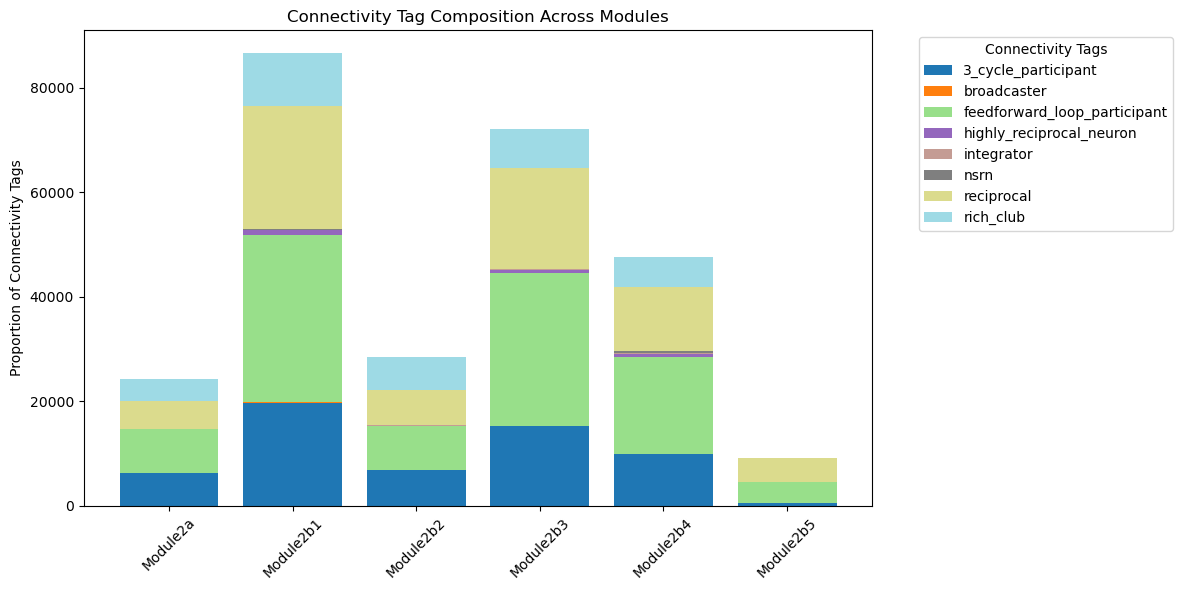

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

Module_list = ['Module2a','Module2b1','Module2b2','Module2b3','Module2b4','Module2b5']

# Preprocessing: ensure consistent tag combinations across all modules
all_tags = sorted(set(tag for stats in module_tag_stats.values() for tag in stats.index))
df = pd.DataFrame(index=all_tags, columns=Module_list).fillna(0)

# Construct the stacked DataFrame: each column is a module, each row is a tag
for module in Module_list:
    for tag, val in module_tag_stats[module].items():
        df.loc[tag, module] = val

# Fixed color map (consistent with previous visualizations)
import matplotlib.cm as cm
cmap = cm.get_cmap("tab20", len(all_tags))
tag_color_map = {tag: cmap(i) for i, tag in enumerate(all_tags)}

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = pd.Series([0] * len(Module_list), index=Module_list)

for tag in all_tags:
    values = df.loc[tag]
    ax.bar(Module_list, values, bottom=bottom, label=tag, color=tag_color_map[tag])
    bottom += values

# Style settings
ax.set_ylabel("Proportion of Connectivity Tags")
ax.set_title("Connectivity Tag Composition Across Modules")
ax.legend(title="Connectivity Tags", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

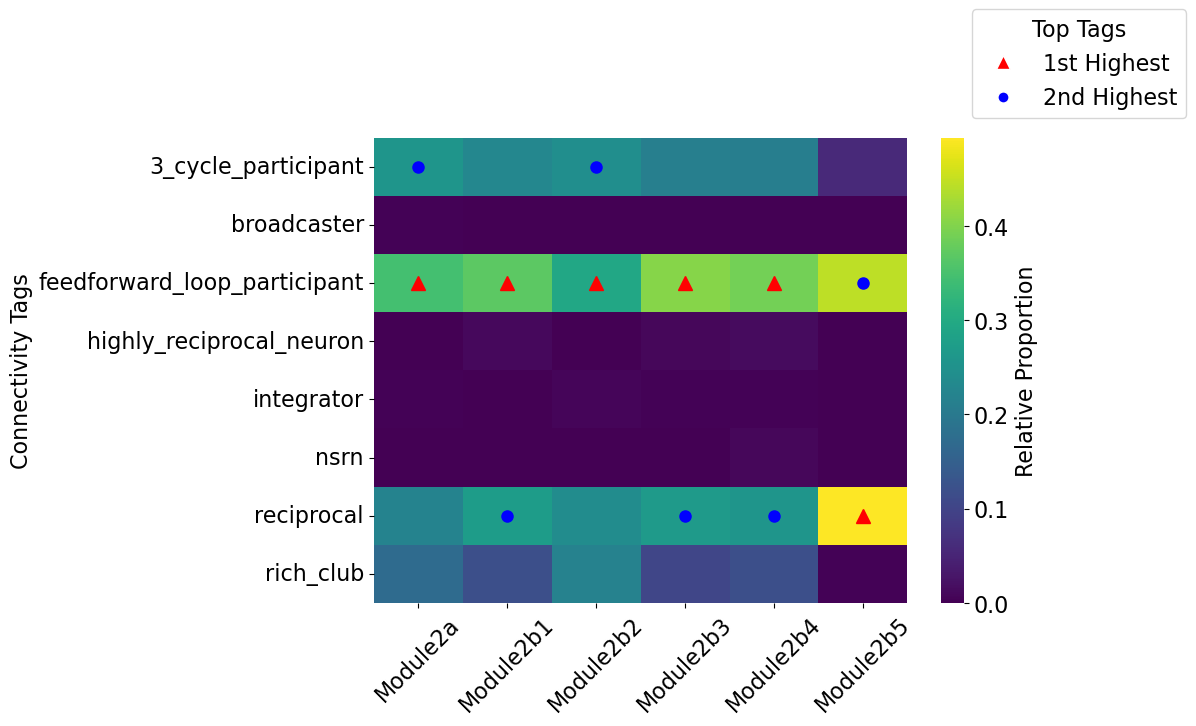

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
plt.rcParams['font.size'] = 16

# Step 1: Normalize per module (column-wise)
df_norm = df.div(df.sum(axis=0), axis=1)

# Step 2: Plot heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_norm, cmap="viridis", cbar_kws={"label": "Relative Proportion"})

# Step 3: Add triangle and circle markers for top 2 tags per module
for col_idx, module in enumerate(df_norm.columns):
    col_data = df_norm[module]
    top2 = col_data.nlargest(2)

    for rank, (tag, value) in enumerate(top2.items()):
        row_idx = df_norm.index.get_loc(tag)
        if rank == 0:
            # First: red triangle
            ax.plot(col_idx + 0.5, row_idx + 0.5, marker="^", color="red", markersize=10)
        elif rank == 1:
            # Second: blue circle
            ax.plot(col_idx + 0.5, row_idx + 0.5, marker="o", color="blue", markersize=8)

# Custom legend with the actual markers
legend_elements = [
    Line2D([0], [0], marker='^', color='w', label='1st Highest', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='2nd Highest', markerfacecolor='blue', markersize=8)
]

# Move the legend to avoid overlap with the color bar
ax.legend(handles=legend_elements, title="Top Tags", bbox_to_anchor=(1.1, 1.3), loc='upper left')

# Adjust layout to avoid overlap
plt.subplots_adjust(right=0.85)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Labels
#plt.title("Normalized Heatmap of Connectivity Tags per Module")
#plt.xlabel("Modules")
plt.ylabel("Connectivity Tags")
plt.tight_layout()
plt.show()